In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r"C:\Users\alisa\OneDrive\Desktop\Alzheimer's Disease\alzheimers_disease_data.csv")

In [3]:
data.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [4]:
new_df = data.drop(columns=['PatientID', 'Gender', 'Ethnicity', 'EducationLevel',
       'Smoking', 'AlcoholConsumption', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'SystolicBP','DiastolicBP', 'Confusion',
       'Disorientation', 'DifficultyCompletingTasks',
       'Forgetfulness', 'DoctorInCharge'])

In [5]:
print(type(new_df))
print(new_df.shape)

<class 'pandas.core.frame.DataFrame'>
(2149, 18)


In [6]:
new_df.columns

Index(['Age', 'BMI', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'HeadInjury', 'Hypertension', 'CholesterolTotal', 'CholesterolLDL',
       'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE',
       'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL',
       'PersonalityChanges', 'Diagnosis'],
      dtype='object')

testing

In [7]:
X = new_df.drop(columns=['Diagnosis'])
y = new_df['Diagnosis']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [24]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import cross_val_score

brf = BalancedRandomForestClassifier(random_state=42)
scores = cross_val_score(brf, X, y, cv=5, scoring='f1')

print("F1 scores:", scores)
print("Mean F1:", scores.mean())


c:\Anacondaa\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
c:\Anacondaa\Lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
c:\Anacondaa\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
c:\Anacondaa\Lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `s

F1 scores: [0.97402597 0.97124601 0.97087379 0.99346405 0.7080292 ]
Mean F1: 0.9235278032382782


c:\Anacondaa\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
c:\Anacondaa\Lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
c:\Anacondaa\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
c:\Anacondaa\Lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `s

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       401
           1       0.96      0.88      0.92       244

    accuracy                           0.94       645
   macro avg       0.94      0.93      0.93       645
weighted avg       0.94      0.94      0.94       645



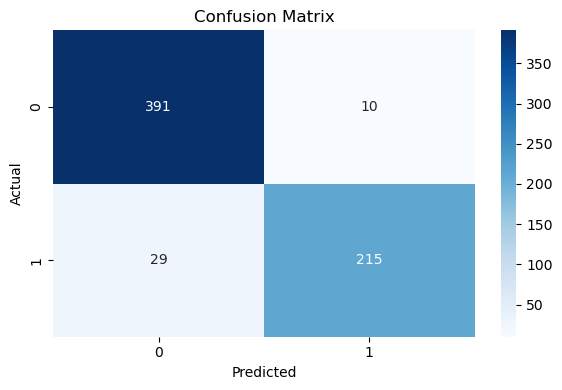

Accuracy: 0.9395
F1 Score: 0.9168


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train XGBoost Regressor
model = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train_scaled, y_train)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# 5. Predict
y_pred = model.predict(X_test_scaled)

# 6. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 7. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# 8. Optional: Print accuracy and F1 Score
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")



SVC Classification Report
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       401
           1       0.00      0.00      0.00       244

    accuracy                           0.62       645
   macro avg       0.31      0.50      0.38       645
weighted avg       0.39      0.62      0.48       645

Accuracy: 0.6217
F1 Score: 0.0000


c:\Anacondaa\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Anacondaa\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Anacondaa\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


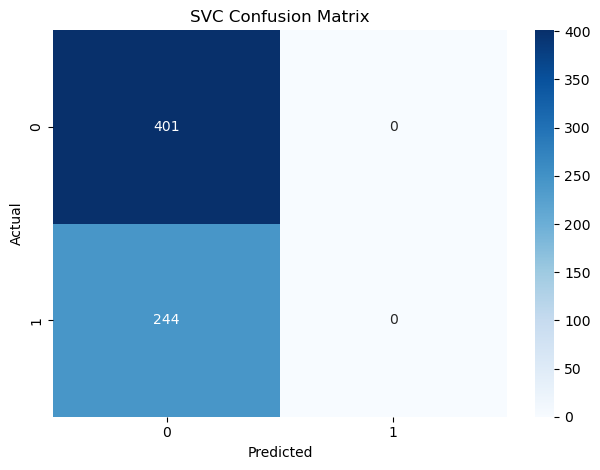


GradientBoosting Classification Report
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       401
           1       0.94      0.90      0.92       244

    accuracy                           0.94       645
   macro avg       0.94      0.93      0.94       645
weighted avg       0.94      0.94      0.94       645

Accuracy: 0.9411
F1 Score: 0.9202


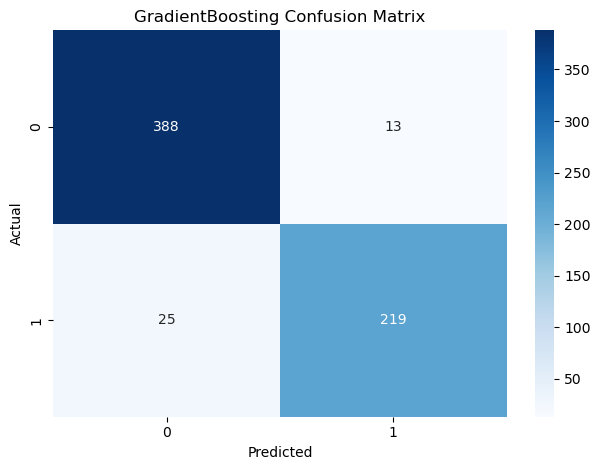


CatBoost Classification Report
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       401
           1       0.95      0.89      0.92       244

    accuracy                           0.94       645
   macro avg       0.94      0.93      0.94       645
weighted avg       0.94      0.94      0.94       645

Accuracy: 0.9426
F1 Score: 0.9218


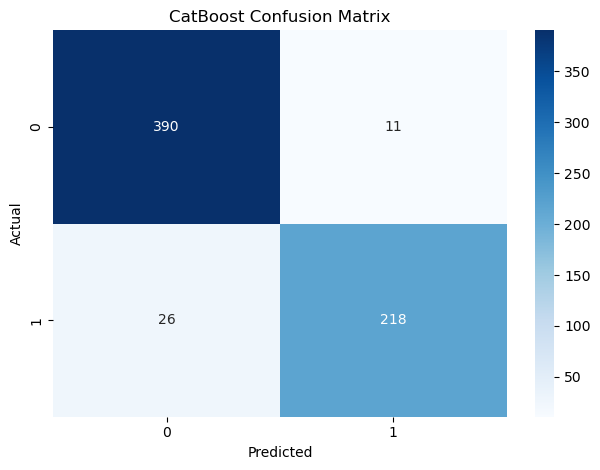

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models
models = {
    'SVC': SVC(),  # SVM for classification
    'GradientBoosting': GradientBoostingClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)
}

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\n{name} Classification Report")
    print(classification_report(y_test, y_pred))
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


# Hyperparameter Tuning

## CatBoostRegressor

Fitting 5 folds for each of 30 candidates, totalling 150 fits

Tuned CatBoost Classification Report:
Best Params: {'random_strength': 1, 'learning_rate': 0.1, 'l2_leaf_reg': 3, 'iterations': 100, 'depth': 8, 'bagging_temperature': 0.2}
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       401
           1       0.95      0.91      0.93       244

    accuracy                           0.95       645
   macro avg       0.95      0.94      0.94       645
weighted avg       0.95      0.95      0.95       645

Accuracy: 0.9457
F1 Score: 0.9266


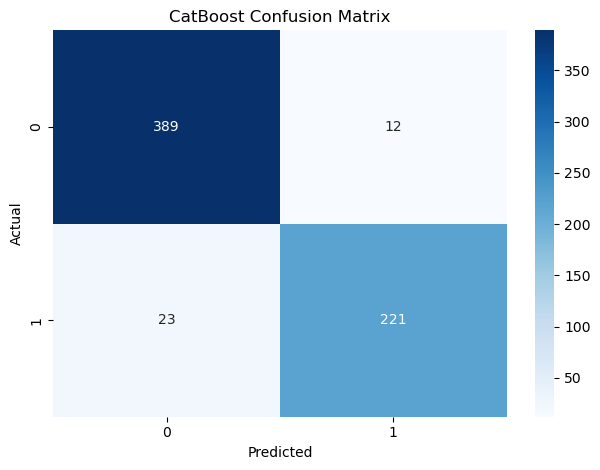

In [11]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Base classifier
catboost_clf = CatBoostClassifier(verbose=0, random_state=42)

# Hyperparameter grid
param_dist = {
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'iterations': [100, 300, 500, 1000],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'bagging_temperature': [0.2, 0.5, 1.0],
    'random_strength': [1, 5, 10]
}

# Randomized search
random_search = RandomizedSearchCV(
    estimator=catboost_clf,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='accuracy',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the search
random_search.fit(X_train, y_train)

# Best model
best_model = random_search.best_estimator_

# Predict and evaluate
y_pred = best_model.predict(X_test)

# Print results
print("\nTuned CatBoost Classification Report:")
print(f"Best Params: {random_search.best_params_}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("CatBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


## Random Forest Regressor (RFR)

Fitting 5 folds for each of 30 candidates, totalling 150 fits

Tuned Random Forest Classification Report:
Best Params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': False}
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       401
           1       0.95      0.88      0.91       244

    accuracy                           0.94       645
   macro avg       0.94      0.92      0.93       645
weighted avg       0.94      0.94      0.94       645

Accuracy: 0.9364
F1 Score: 0.9359


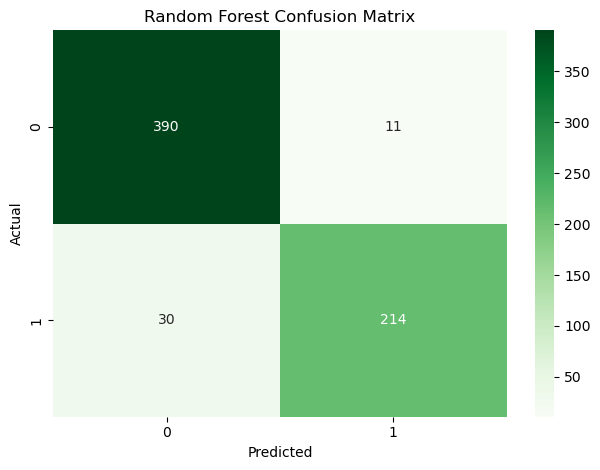

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Base model
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='accuracy',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

# Predict
y_pred = best_model.predict(X_test)

# Evaluation
print("\nTuned Random Forest Classification Report:")
print(f"Best Params: {random_search.best_params_}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


## XGBoost Regressor

Fitting 5 folds for each of 30 candidates, totalling 150 fits

Tuned XGBoost Classification Report:
Best Params: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       401
           1       0.95      0.89      0.92       244

    accuracy                           0.94       645
   macro avg       0.94      0.93      0.93       645
weighted avg       0.94      0.94      0.94       645

Accuracy: 0.9380
F1 Score: 0.9375


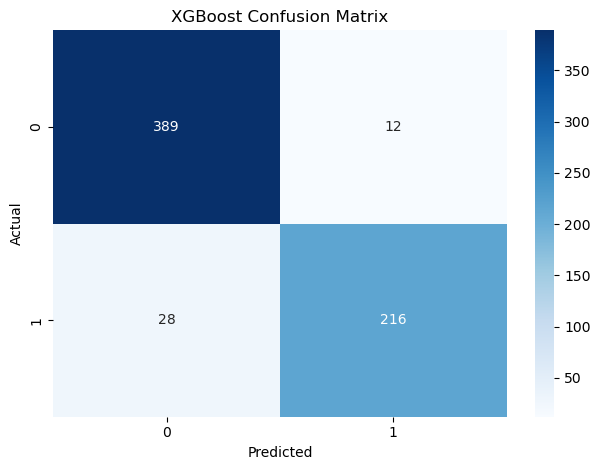

In [13]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Base model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='accuracy',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit model
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

# Predict
y_pred = best_model.predict(X_test)

# Evaluation
print("\nTuned XGBoost Classification Report:")
print(f"Best Params: {random_search.best_params_}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


## LightGBM Regressor

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Info] Number of positive: 516, number of negative: 988
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000654 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2847
[LightGBM] [Info] Number of data points in the train set: 1504, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.343085 -> initscore=-0.649576
[LightGBM] [Info] Start training from score -0.649576
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

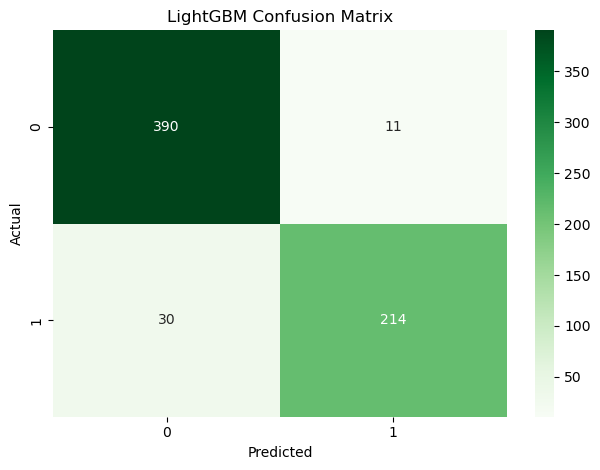

In [14]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Base model
lgb_model = LGBMClassifier(random_state=42)

# Hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [-1, 5, 10],
    'num_leaves': [31, 50, 100],
    'min_child_samples': [10, 20, 30]
}

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='accuracy',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

# Predict
y_pred = best_model.predict(X_test)

# Evaluation
print("\nTuned LightGBM Classification Report:")
print(f"Best Params: {random_search.best_params_}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("LightGBM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


Fitting 5 folds for each of 20 candidates, totalling 100 fits

Tuned Gradient Boosting Classification Report:
Best Params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 5, 'learning_rate': 0.05}
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       401
           1       0.95      0.87      0.91       244

    accuracy                           0.93       645
   macro avg       0.94      0.92      0.93       645
weighted avg       0.93      0.93      0.93       645

Accuracy: 0.9333
F1 Score: 0.9327


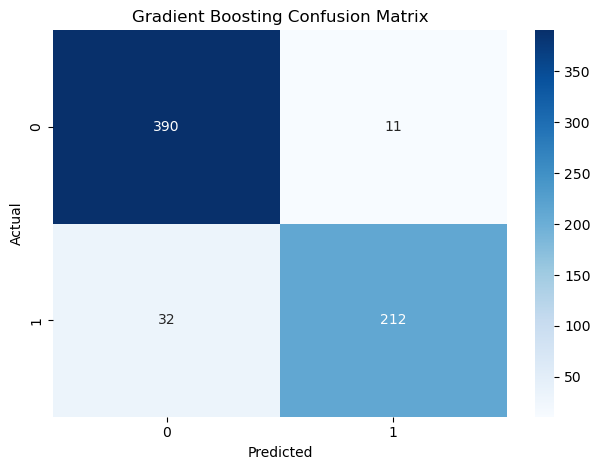

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Base model
gb_model = GradientBoostingClassifier(random_state=42)

# Hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

# Predict
y_pred = best_model.predict(X_test)

# Evaluation
print("\nTuned Gradient Boosting Classification Report:")
print(f"Best Params: {random_search.best_params_}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Gradient Boosting Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
